# Exercise 3 Modeling the statistics of the input to an artifical system

**Objective:** The goal of this assignment is to learn to describe a visual system, and to analyse its statistics
The artificial visual system was assigned to groups randomly. Please download the dataset and focus on that system. The link to the dataset will be sent to you shortly. 

**Components:** There is a written component, where you have to describe the visual system, and a coding and interpretation component for the statistics.

**Code organization:** Several files are provided to you: exercise3.ipynb (the jupyter notebook); io_image_data.py; image_data_analysis.py. 
In exercise3.ipynb you should write your written text answers. In terms of code you only need to change the exercise_folder_path and the artificial system. 
You should write code on the file image_data_analysis.py

**Submission:** Please name your file ExerciseX_GroupY.zip, where X is the number of the exercise and Y is your group number. The submission deadline is May 4, please try to submit on the moodle. The fifth class will be held on zoom just to answer questions. Please use the forum created for this TD.


**Question 1.** Describe the functional and hardware requirements of the visual system that you are modeling. Please note that visual systems should be energetically cheap, meaning, hardware requirements should fit the system main functions. From the list below select three functions and the corresponding hardware requirements that are convenient.

List of functional requirements: face recognition, motion detection, pedestrian detection, anomalies detection, predators detection, peers recognition, vehicles detection, indoor classification, outdoor navigation, multicamera integration, pose estimation, people counter, traffic sign recognition, depth estimation, road detection, human-robot interaction, other (specify which)

List of hardware requirements: number of cameras, resolution, frame rate, the field of view size, chromatics, range, static/active cameras, other (specify which).

A1: Write your answer here  
A domestic robot has two main tasks : do all the cleaning things in the house and help and keep company to people in the house.  
To do both of these tasks, the robot has to be able to move arround the house or the appartment. It needs depth estimation which can be done using 2 cameras to have stereoscopy and be able to calculate depth in the image. It could also be done with a LiDAR.  
It also needs indoor classification to recognize objects in the house. For example, the person could ask the robot to bring something to drink. It needs a sufficient camera resolution and a large field of view because of the possibly narrow spaces the robot will be moving itself in.  
In order for the person to be able to communicate with the robot, it needs some kind of human-robot interaction which could be done with a microphone and a speaker to make the robot hear and speak. 

In [11]:
# load packages
%load_ext autoreload
#this is to update your packages automatically
%autoreload 2
# more info https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html#autoreload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io_image_data
import image_data_analysis

# Usually you do not need to change this parameters. 
sample_size = [32,32] #image sample size for the power spectrum
grid_size = [3,3]
number_of_samples = int(1e5); #number of samples from the dataset for estimating PS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(2401, 480, 640)
(480, 640)


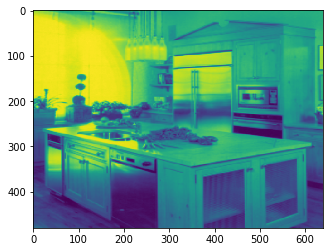

In [12]:
exercise_folder_path = '/Users/alexandre/Documents/ENSTA/2A/MI210/Exercise3/'  # This string must end with a slash ('/') 
dataset_type = 'domestic_robot' #please choose the one asigned to your group. Possible datasets = {airport_robot, autonomous_vehicle,domestic_robot, submarine_robot}
dataset_file_name = exercise_folder_path+dataset_type+'.hdf5'

#defining output file names 
average_PS_results_file_name = exercise_folder_path + "average_PS.hdf5" 
average_PS_radial_results_file_name = exercise_folder_path + "average_PS_radial.hdf5"
average_PS_local_results_file_name = exercise_folder_path + "average_PS_Local.hdf5"

image_data_analysis.test(dataset_file_name)

**Question 2.** In image_data_analysis.py write a function generates randomly the top left corner position of the sample in the image. You should be careful and be sure that the entire image sample will be inside the image. From the top left corner position and the sample size, you can define the “safe” limits.

**Question 3.** In image_data_analysis.py write a function that, using a top-left corner randomly generated and a fixed size, extracts an image sample.

**Question 4.** In image_data_analysis.py write a function that calculates the power spectrum of an image sample

**Question 5.** In image_data_analysis.py write a function that averages the power spectrum of N random image sample

**Question 6.** Estimate the average 2D power spectrum of samples of the natural images (32x32 pixels) of your visual system and compare it with the statistics of the natural images of humans/monkeys visual system


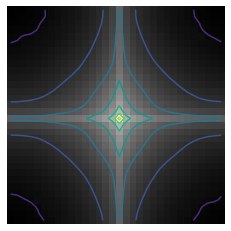

In [13]:
average_PS = image_data_analysis.get_average_PS(dataset_file_name, sample_size, number_of_samples)

io_image_data.saveH5(average_PS_results_file_name,'average_PS',average_PS)
image_data_analysis.make_average_PS_figure(average_PS)

A6. Write your answer here  
The average 2D power spectrum of the natural images of our system is pretty similar to the one of the images of monkey/humans visual system. The power is mainly concentrated at the center of the image.


**Question 7.** Estimate the RADIAL average 2D power spectrum of samples of the natural images of your visual system and compare it with the statistics of the natural images of humans/monkeys (hint 1: the slides of the class might be useful, hint 2: it is already implemented a function that returns the radial frequency for a 2D frequency space, you just have to use it to calculate the average)

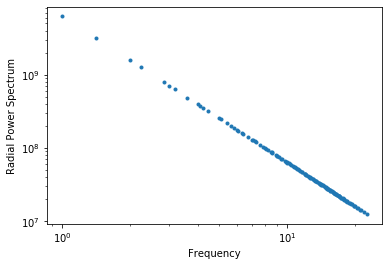

In [29]:
average_PS_radial = image_data_analysis.get_radial_PS(average_PS)
radial_freq = image_data_analysis.get_radial_freq(average_PS.shape)
io_image_data.saveH5(average_PS_radial_results_file_name,'average_PS_radial',average_PS_radial)
image_data_analysis.make_average_PS_radial_figure(np.unique(radial_freq),average_PS_radial)

A7. Write your answer here  
The shape of the graph is really similar to the radial average power spectrum of naturals images of humans/monkeys visual systems. However, the values of the radial power spectrum are a thousand times greater than the graph seen in class.

**Question 8:** Consider a grid of 3x3 that defines 9 regions as shown in Figure 1. Thereafter, repeat Question2-6 in each region. Compare the local results with the position invariant results. Do you think that the radial average is the correct step for the analysis? Why?
<img src="Picture1.png" alt="grid" width="200"/>


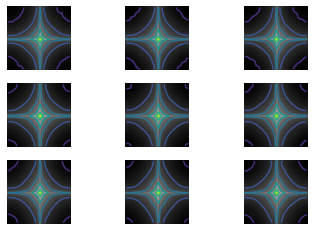

In [8]:
average_PS_local = image_data_analysis.get_average_PS_local(dataset_file_name, sample_size, grid_size, number_of_samples)
io_image_data.saveH5(average_PS_local_results_file_name,'average_PS',average_PS_local)
image_data_analysis.make_average_PS_local_figure(average_PS_local, grid_size)

A8. Write your answer here  
We think it is not the correct step for the analysis because we already separated the image in 9 images and a radial average would not give any valuable information on the image, only on the parts of the images.